In [1]:
import os
import csv
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
base = '0.75'
folder = f'results_{base}'

In [3]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

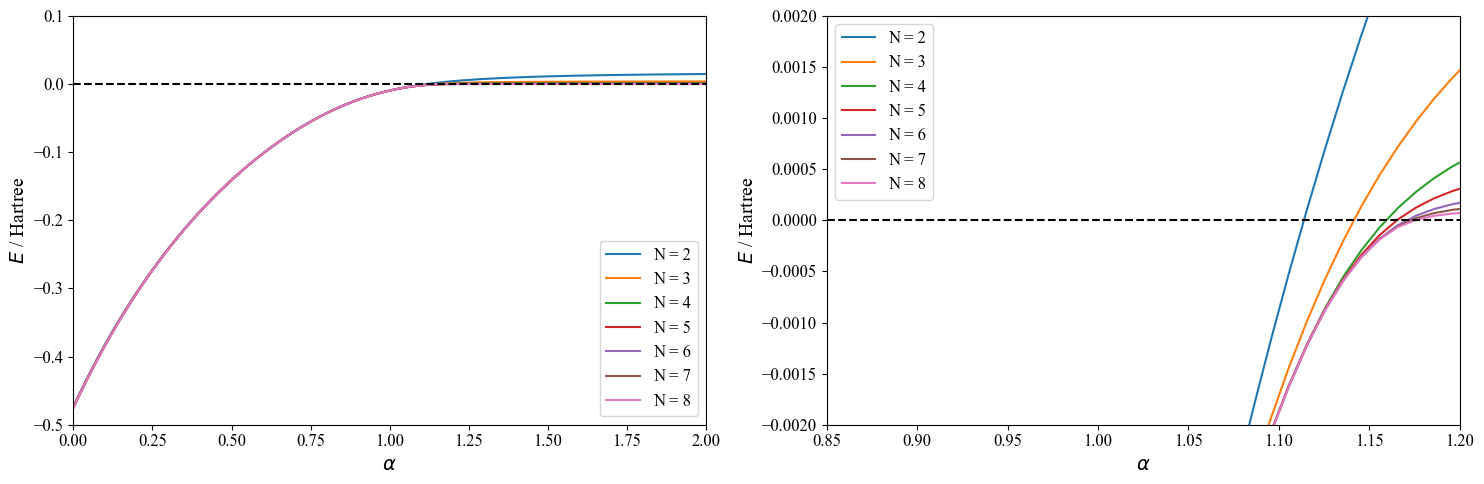

In [4]:
# colors = ['red', '#0027FF', 'green']
# lines = ['--', ':', '-.']
folders = [folder for folder in os.listdir(folder) if '.' not in folder]

rows = 1
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 5))

files = [file for file in os.listdir(f'{folder}') if file.endswith('.csv')]
files = sorted(files, key=ordenar_por_numero)

for n in range(2):
    for i, file in enumerate(files):
        N = int(file.split('=')[1].split('.')[0])

        alpha  = []
        energy = []

        with open(f'{folder}/{file}', newline='') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)

            for row in reader:
                alpha.append(float(row[0]))
                energy.append(float(row[1]))


        row = 1
        column = n

        axs[column].plot(alpha, energy, label=f'N = {N}')
        # axs[column].set_title(f'$N = {N}$', fontsize=16)
        axs[column].set_xlabel(r'$\alpha$', fontsize=14)
        axs[column].set_ylabel('$E$ / Hartree', fontsize=14)
        axs[column].grid(False)
        axs[column].legend()
        if n == 0:
            axs[column].set_xlim(0, 2)
            axs[column].set_ylim(-0.5, 0.1)
        if n == 1:
            axs[column].set_xlim(0.85, 1.20)
            axs[column].set_ylim(-0.002, 0.002)


    energy = np.linspace(0, 0, 200).astype(int)
    axs[column].plot(alpha, energy, color='black', marker='', linestyle='--')


plt.tight_layout()
plt.savefig(f'{folder}/yukawa_classic_{base}_plot.png')
plt.savefig(f'../../../TFG/Figuras/yukawa_classic_{base}_plot.png')
plt.show()